## Naive Risk Budgeting Strategies between PSP and GHP

In [27]:
import numpy as np
import pandas as pd
import AKCRiskKit as ark
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
rates, zc_prices = ark.cir(10,500,b=0.03,r_0=0.03)
price_10 =ark.bond_price(10,100,0.05,12,rates)
price_30 =ark.bond_price(30,100,0.05,12,rates)
rets_30 = ark.bond_total_return(price_30,100,0.05,12)
rets_10 = ark.bond_total_return(price_10,100,0.05,12)
rets_bonds = ark.bt_mix(rets_10,rets_30,allocator=fixedmix_allocator,w1=0.6)
mean_rets_bonds = rets_bonds.mean(axis="columns")
ark.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
0,0.036494,0.003563,0.368043,4.320073,-0.001444,-0.001559,9.385412,-0.000292


In [39]:
price_eq = ark.gbm(10,500,mu=0.07,sigma=0.15)
#rets_eq = ark.gbm(10,500,mu=0.07,sigma=0.15,prices=False)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [40]:
rets_7030b = bt_mix(rets_eq,rets_bonds,allocator=fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis=1)
ark.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Volatity,Skewness,Kurtosis,Cornish-Fisher VaR,Historic cVaR,Sharpe Ratio,Max Drawdown
0,0.061507,0.004141,-0.214124,3.97416,-0.002981,-0.003209,14.098593,0.0


In [41]:
summaries = ark.summary_stats(rets_7030b)

In [42]:
summaries.mean()

Annualized Return      0.056021
Annualized Volatity    0.107486
Skewness              -0.004447
Kurtosis               2.965668
Cornish-Fisher VaR     0.045866
Historic cVaR          0.045098
Sharpe Ratio           0.494828
Max Drawdown          -0.206906
dtype: float64

In [46]:
pd.concat([
    ark.terminal_stats(rets_bonds,name="FI"),
    ark.terminal_stats(rets_eq,name="Equity"),
    ark.terminal_stats(rets_7030b,name="70/30")

    ],axis=1)


,FI,Equity,70/30
mean,1.392246,2.024252,1.816623
std,0.107407,1.107675,0.655595
p_breach,NaN,0.038000,0.004000
e_short,NaN,0.103735,0.203942
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


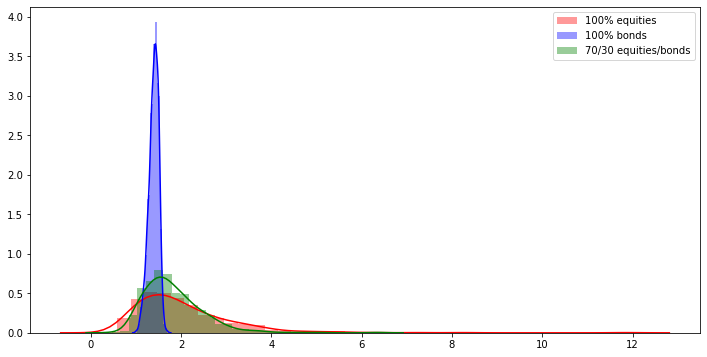

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.distplot(ark.terminal_values(rets_eq),color="red",label="100% equities")
sns.distplot(ark.terminal_values(rets_bonds),color="blue",label="100% bonds")
sns.distplot(ark.terminal_values(rets_7030b),color="green",label="70/30 equities/bonds")
plt.legend()

## Glide Paths for Allocations

In [57]:
rets_g8020 = ark.bt_mix(rets_eq,rets_bonds,allocator=ark.glidepath_allocator,start_glide=0.80,end_glide=0.20)

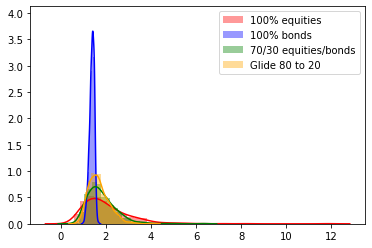

In [59]:
sns.distplot(ark.terminal_values(rets_eq),color="red",label="100% equities")
sns.distplot(ark.terminal_values(rets_bonds),color="blue",label="100% bonds")
sns.distplot(ark.terminal_values(rets_7030b),color="green",label="70/30 equities/bonds")
sns.distplot(ark.terminal_values(rets_g8020),color="orange",label="Glide 80 to 20")
plt.legend()

In [60]:
pd.concat([
    ark.terminal_stats(rets_bonds,name="FI"),
    ark.terminal_stats(rets_eq,name="Equity"),
    ark.terminal_stats(rets_7030b,name="70/30"),
    ark.terminal_stats(rets_g8020,name="Glide path 80 to 20")

    ],axis=1)

,FI,Equity,70/30,Glide path 80 to 20
mean,1.392246,2.024252,1.816623,1.691966
std,0.107407,1.107675,0.655595,0.457484
p_breach,NaN,0.038000,0.004000,0.002000
e_short,NaN,0.103735,0.203942,0.032958
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN
